In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants, units
from astropy.coordinates import Angle
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd
import os
#import dustmaps

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [3]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

In [4]:
df = pd.read_csv(rootdir + 'gal_surv_complete.csv')

In [5]:
df

,MUSE_ID,F814W_ID,F140W_ID,F160W_ID,RA,Dec,E(B-V),z_gal,theta,d_proj,...,Mr,Mg,MB,u-g,M_star_KC,M_star15,M_star24,f_line (1e-17),W(CIV),Comments
0,122,4656,265,286,231.101443,9.982304,0.0397,0.0966,26.863312,49.697390,...,-14.08,-13.55,-13.43,0.72,7.4,7.6,7.5,"3.510, 0.009",<0.04,Halpha
1,52,4179,397,547,231.102849,9.976121,0.0397,0.1203,5.247984,12.265723,...,-20.65,-19.81,-19.47,1.75,10.4,10.4,10.7,"147.580, 0.009",<0.05,"Johnson+14, Mstar=10.6, closer member"
2,51,5074,396,544,231.103285,9.977136,0.0397,0.1204,9.196677,21.492790,...,-19.25,-18.62,-18.39,1.35,9.7,9.8,10.0,"36.297, 0.007",<0.05,"Johnson+14, Mstar=10.0"
3,-1,-1,-1,-1,231.103146,9.979202,0.0397,0.1264,16.042667,37.292275,...,-12.66,-12.08,-11.71,1.68,7.3,7.1,7.8,"0.85, 0.01",<0.04,NaN
4,-1,-1,-1,-1,231.098090,9.969647,0.0404,0.1335,23.549638,58.442498,...,-11.30,-10.28,-9.85,2.36,6.9,6.7,7.6,"0.64, 0.01",<0.05,NaN
5,20,4638,214,239,231.097267,9.983063,0.0397,0.1393,34.097981,84.189245,...,-15.23,-14.93,-14.86,0.45,7.9,7.7,7.4,"2.25, 0.02",<0.05,NaN
6,82,7918,530,541,231.096113,9.971428,0.0404,0.2791,24.546576,104.250363,...,-15.25,-15.21,-15.00,0.41,8.3,7.2,7.4,"0.44, 0.03",<0.1,Really faint galaxy
7,96,7228,656,620,231.098099,9.969480,0.0404,0.2915,24.013211,107.666094,...,-15.11,-14.33,-14.37,0.31,8.2,8.0,6.9,"0.718, 0.009",<0.1,NaN
8,80,6535,556,563,231.101791,9.971945,0.0404,0.3198,10.581162,49.264456,...,-17.75,-17.32,-17.16,0.94,9.1,8.9,9.3,"5.29, 0.03",<0.2,NaN
9,79,5792,529,534,231.099016,9.971783,0.0404,0.3286,15.562964,74.036258,...,-20.47,-19.66,-19.35,1.67,10.3,10.3,10.6,"7.28, 0.01",<0.1,"OII flux, Ha in absorption. Also overlapping w..."


In [6]:
z_gal_list = list(df['z_gal'])
f_line_list = list(df['f_line (1e-17)'])
Mstar_list = list(df['M_star24'])
cm_list = list(df['Comments'])

In [7]:
from math import nan

In [8]:
z_gal_filt_list = []
f_line_filt_list = []
Mstar_filt_list = []

for i in range(len(z_gal_list)):
    z_gal = z_gal_list[i]
    f_line = f_line_list[i]
    Mstar = Mstar_list[i]
    cm = str(cm_list[i])
    
    if z_gal>.4 and '<' not in f_line:
        if 'LDSS' not in cm:
            z_gal_filt_list.append(z_gal)
            f_line_filt_list.append(f_line)
            Mstar_filt_list.append(Mstar)
        else:
            print(cm)

LDSS z, [OII] on blue edge. ps-g not covered, ps-r blue edge
LDSS z, flux calibrated w/ F814W
LDSS z. CIV not covered
LDSS z, applied a flux correction of 8%


In [9]:
def d_L(z, H0=70, Omega_m=0.3, Omega_lam=0.7):
    
    d_H = (constants.c/(H0*(units.km * units.s**-1 * units.Mpc**-1))).to(units.kpc)
    
    z_arr = np.arange(0, z+0.01, 0.01)
    E_arr = np.sqrt(Omega_m*(1+z_arr)**3 + Omega_lam)
    
    return ((1+z) * d_H * np.trapz(E_arr**-1, z_arr)).value

In [10]:
d_L_filt_list = [d_L(z) for z in z_gal_filt_list]

In [11]:
L_OII_filt_list = []

for i in range(len(f_line_filt_list)):
    f_line = float(f_line_filt_list[i].split(',')[0])
    d_L = d_L_filt_list[i]*3.086e+21 # kpc to cm
    L_OII = 4*np.pi*d_L**2*f_line*1e-17
    L_OII_filt_list.append(L_OII)

In [12]:
SFR_filt_list = [6.58*1e-42*L for L in L_OII_filt_list]

In [13]:
for i in range(len(z_gal_filt_list)):
    print(z_gal_filt_list[i], SFR_filt_list[i])

0.4395 0.07817913756514842
0.4581 0.9903276720624947
0.4784 0.4374645195711961
0.5205 0.49614741827669556
0.5257 0.04193012195075629
0.5356 1.5199180208071048
0.6174 0.14300774590911933
0.6178 1.4307848928963989
0.6183 1.2630505870403874
0.6469 0.11046761944731158
0.6478 0.07610383787149669
0.6531 0.44549622486986445
0.678 0.3279974336470013
0.7293 2.041044048949286
0.8217 1.3056956844519494
0.8458 0.8088616343753496
0.9576 2.458734091209025
1.0959 0.5072328078809849
1.1932 0.4828319006839744
1.1935 3.54710226242703
1.2256 2.257684328964468
1.2787 0.5566568819757866


In [13]:
np.mean(z_gal_filt_list)

0.7626545454545455

Text(0, 0.5, 'Counts')

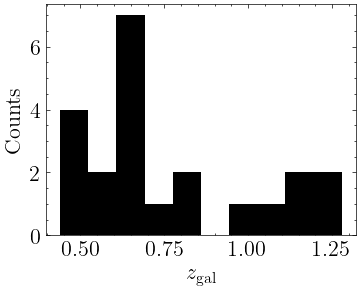

In [14]:
fig, ax = plt.subplots(1, figsize=(4,3))
ax.hist(z_gal_filt_list)
ax.set_xlabel(r'$z_\mathrm{gal}$')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

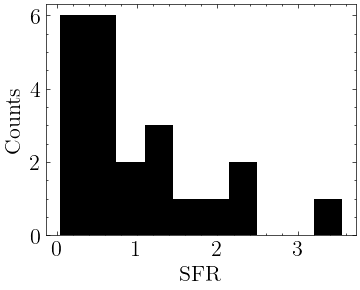

In [15]:
fig, ax = plt.subplots(1, figsize=(4,3))
ax.hist(SFR_filt_list)
ax.set_xlabel('SFR')
ax.set_ylabel('Counts')

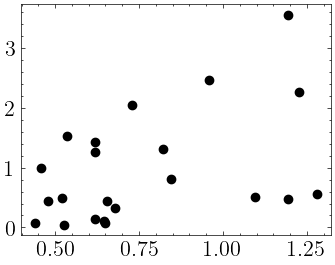

In [27]:
fig, ax = plt.subplots(1, figsize=(4,3))
ax.scatter(z_gal_filt_list, SFR_filt_list)

In [31]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x)
    ax_histy.hist(y, orientation='horizontal')

Text(0, 0.5, 'SFR ($M_\\odot \\ \\mathrm{yr}^{-1}$)')

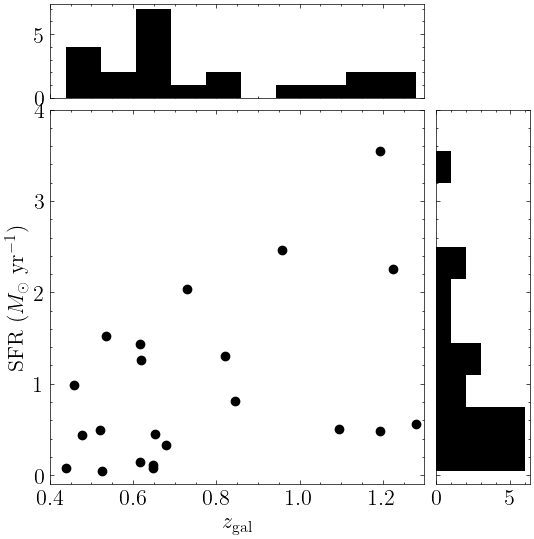

In [32]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.set_xlim(0.4,1.3)

ax.set_ylim(-0.1,4)
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
scatter_hist(z_gal_filt_list, SFR_filt_list, ax, ax_histx, ax_histy)

ax.set_xlabel(r'$z_\mathrm{gal}$')
ax.set_ylabel(r'SFR ($M_\odot \ \mathrm{yr}^{-1}$)')

Text(0, 0.5, '$\\log(M_\\mathrm{star}/M_\\odot)$')

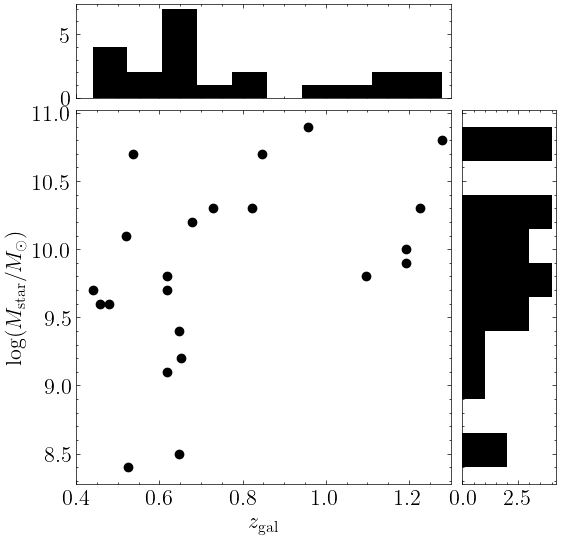

In [35]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.set_xlim(0.4,1.3)

#ax.set_ylim(-0.1,4)
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
scatter_hist(z_gal_filt_list, Mstar_filt_list, ax, ax_histx, ax_histy)

ax.set_xlabel(r'$z_\mathrm{gal}$')
ax.set_ylabel(r'$\log(M_\mathrm{star}/M_\odot)$')

Text(0, 0.5, 'SFR ($M_\\odot \\ \\mathrm{yr}^{-1}$)')

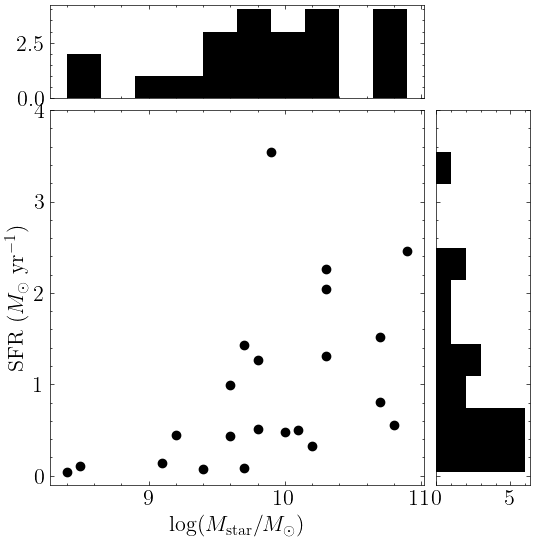

In [33]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
#ax.set_xlim(0.4,1.3)

ax.set_ylim(-0.1,4)
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
scatter_hist(Mstar_filt_list, SFR_filt_list, ax, ax_histx, ax_histy)

ax.set_xlabel(r'$\log(M_\mathrm{star}/M_\odot)$')
ax.set_ylabel(r'SFR ($M_\odot \ \mathrm{yr}^{-1}$)')